In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

results_path = "/Users/matteo/Projects/MFI/results_plot"
path = "/Users/matteo/Projects/MFI"
os.chdir(path)

from pyMFI import MFI
# from pyMFI import run_plumed

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["computer modern roman"], "font.size": 22})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

times = r"$\times$"
pwr_neg = r"$^{-1}$"


# Plot 1 - 1 simulation and a second simulation patched

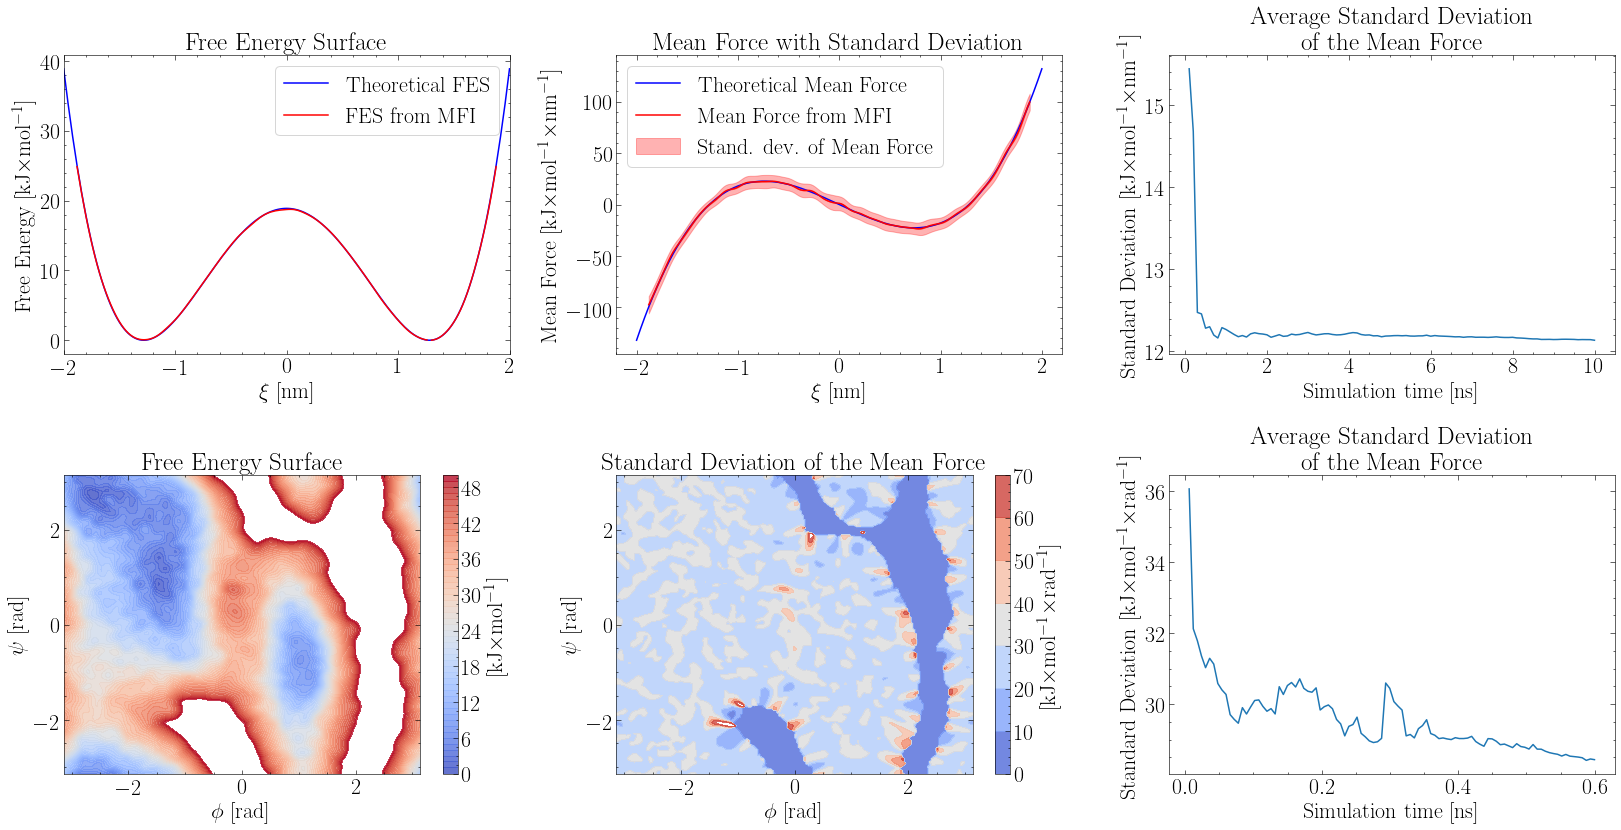

In [11]:
#Load force terms
Ftot_master = []
with open(results_path + "/MFI1D_results.pkl", "rb") as fr:
    Ftot_master.append(pickle.load(fr))

[X, F, Ff, FES, Ftot, ofe, ofe_history, time_history] = Ftot_master[-1]

plt.rcParams["figure.figsize"] = (23,12)
plt.subplot(2,3,1)
plt.plot(X, F, color="blue",label="Theoretical FES")
plt.plot(X, FES, color="red", label="FES from MFI")
plt.ylabel("Free Energy [kJ" + times + "mol" + pwr_neg + "]", fontsize=22)
plt.xlabel(r'$\xi$ [nm]', fontsize=22)
plt.title('Free Energy Surface', fontsize=25)
plt.xlim(-2,2)
plt.legend()

plt.subplot(2,3,2)
plt.plot(X, Ff, color="blue", label="Theoretical Mean Force")
plt.plot(X, Ftot, color="red", label="Mean Force from MFI")
plt.fill_between(X, Ftot, Ftot-ofe/2, color="red", alpha=0.3, label="Stand. dev. of Mean Force")
plt.fill_between(X, Ftot, Ftot+ofe/2, color="red", alpha=0.3)
plt.ylabel('Mean Force [kJ' + times + "mol" + pwr_neg + times + "nm" + pwr_neg + ']', fontsize=22)
plt.xlabel(r'$\xi$ [nm]', fontsize=22)
plt.title('Mean Force with Standard Deviation', fontsize=25)
plt.legend()

plt.subplot(2,3,3)
plt.plot([time/1000 for time in time_history], ofe_history)
plt.ylabel('Standard Deviation [kJ' + times + "mol" + pwr_neg + times + "nm" + pwr_neg + ']', fontsize=22)
plt.xlabel('Simulation time [ns]', fontsize=22)
plt.title('Average Standard Deviation\nof the Mean Force', fontsize=25)



#Load force terms
[X, Y, FES, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, ofv_history, ofe_history, ofe_history_window, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.load_pkl(results_path + "/alanine_dipeptide_300K.pkl")

#integration with the FFT method
# [X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

FES_lim = 51
ofe_map_lim = 71

plt.subplot(2,3,4)
plt.contourf(X, Y, FES, levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.colorbar(label="[kJ" + times + "mol" + pwr_neg + "]")
plt.ylabel(r'$\psi$ [rad]', fontsize=22)
plt.xlabel(r'$\phi$ [rad]', fontsize=22)
plt.title('Free Energy Surface', fontsize=25)

plt.subplot(2,3,5)
plt.contourf(X, Y, ofe, levels=range(0, ofe_map_lim, 10), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.colorbar(label="[kJ" + times + "mol" + pwr_neg + times + "rad" + pwr_neg + "]")
plt.ylabel(r'$\psi$ [rad]', fontsize=22)
plt.xlabel(r'$\phi$ [rad]', fontsize=22)
plt.title('Standard Deviation of the Mean Force', fontsize=25)


plt.subplot(2,3,6)
plt.plot([time/1000 for time in time_history], ofe_history)
plt.ylabel('Standard Deviation [kJ' + times + "mol" + pwr_neg + times + "rad" + pwr_neg + ']', fontsize=22)
plt.xlabel('Simulation time [ns]', fontsize=22)
plt.title('Average Standard Deviation\nof the Mean Force', fontsize=25)


plt.tight_layout()
plt.savefig('results_1_n2.png', dpi=600, bbox_inches='tight')

plt.show()

plt.rcParams["figure.figsize"] = (5,4)


In [34]:
min_grid=np.array((-np.pi, -np.pi))

print(type(min_grid[1]))

<class 'numpy.float64'>


# Plot 2 - 1 long simulation vs. 10 short simulations

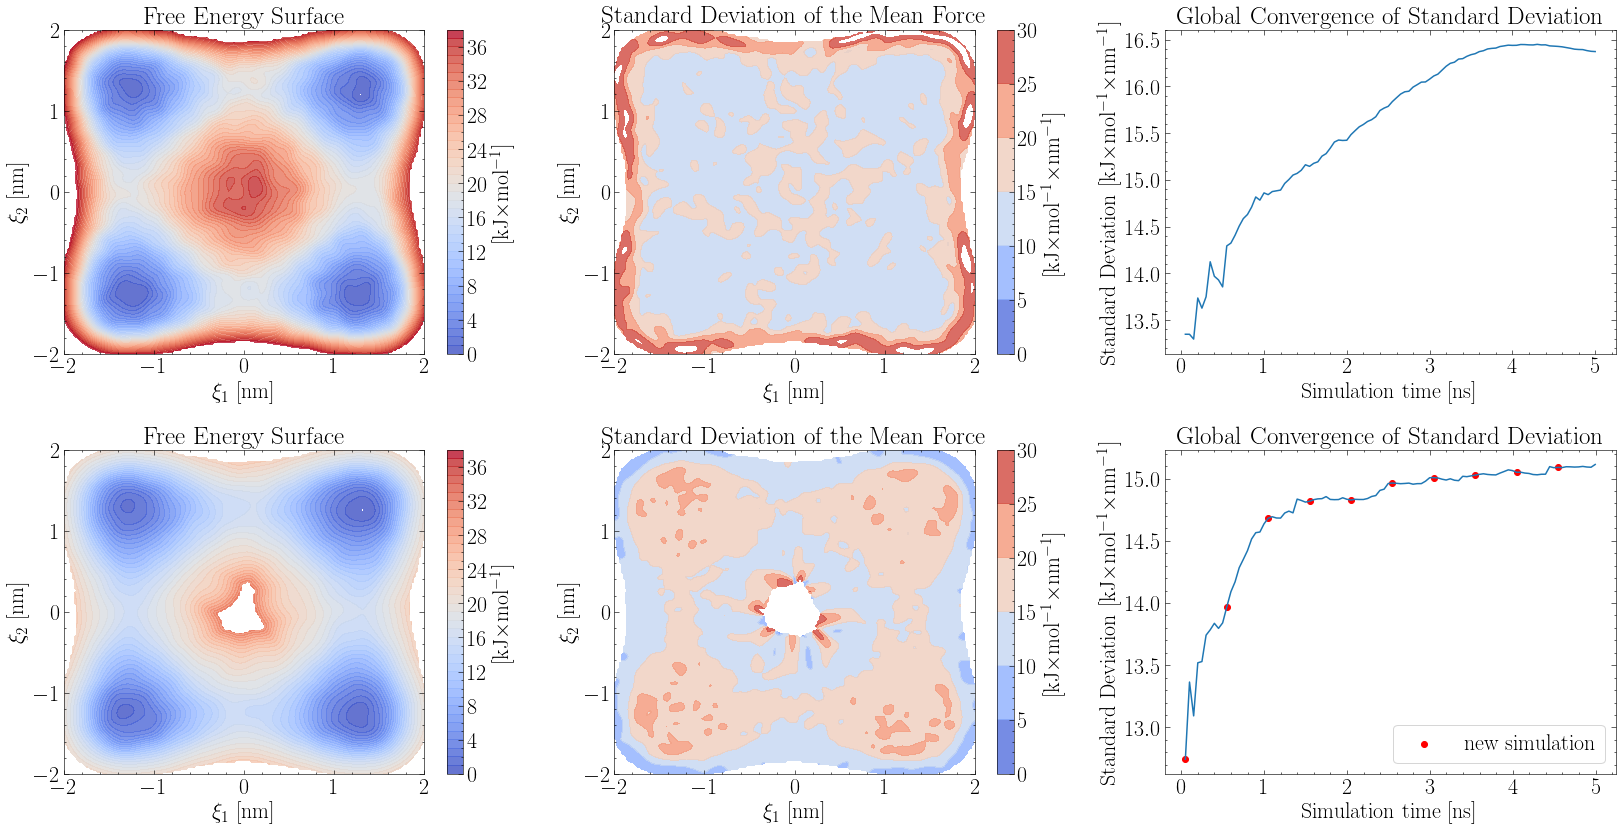

In [96]:
#Load force terms
[X, Y, FES, cutoff, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, ofv_history, ofe_history, ofe_history_window, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.load_pkl(results_path + "/bjola_pot_1M.pkl")

FES_lim = 39
ofe_map_lim = 31

plt.rcParams["figure.figsize"] = (23,12)
plt.subplot(2,3,1)
plt.contourf(X, Y, zero_to_nan(FES*cutoff), levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.xlabel(r'$\xi_1$ [nm]', fontsize=22)
plt.ylabel(r'$\xi_2$ [nm]', fontsize=22)
plt.title('Free Energy Surface', fontsize=25)
plt.colorbar(label="[kJ" + times + "mol" + pwr_neg + "]")

plt.subplot(2,3,2)
plt.contourf(X, Y, zero_to_nan(ofe*cutoff), levels=range(0, ofe_map_lim, 5), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.xlabel(r'$\xi_1$ [nm]', fontsize=22)
plt.ylabel(r'$\xi_2$ [nm]', fontsize=22)
plt.title('Standard Deviation of the Mean Force', fontsize=25)
plt.colorbar(label="[kJ" + times + "mol" + pwr_neg + times + "nm" + pwr_neg + "]")


plt.subplot(2,3,3)
plt.plot([time/1000 for time in time_history], ofe_history)
plt.ylabel('Standard Deviation [kJ' + times + "mol" + pwr_neg + times + "nm" + pwr_neg + ']', fontsize=22)
plt.xlabel('Simulation time [ns]', fontsize=22)
plt.title('Global Convergence of Standard Deviation', fontsize=25)


#Load force terms
[X, Y, FES, Ftot_den, ofe, ofe_history_patch, ofe_history_patch_time, sim_start, sim_start_error] = MFI.load_pkl(results_path + "/bjola_pot_multisim.pkl")
cutoff = np.where(Ftot_den < 10**-5, 0, cutoff)

plt.subplot(2,3,4)
plt.contourf(X, Y, zero_to_nan(FES*cutoff), levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.xlabel(r'$\xi_1$ [nm]', fontsize=22)
plt.ylabel(r'$\xi_2$ [nm]', fontsize=22)
plt.title('Free Energy Surface', fontsize=25)
plt.colorbar(label="[kJ" + times + "mol" + pwr_neg + "]")

plt.subplot(2,3,5)
plt.contourf(X, Y, zero_to_nan(ofe*cutoff), levels=range(0, ofe_map_lim, 5), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.xlabel(r'$\xi_1$ [nm]', fontsize=22)
plt.ylabel(r'$\xi_2$ [nm]', fontsize=22)
plt.title('Standard Deviation of the Mean Force', fontsize=25)
plt.colorbar(label="[kJ" + times + "mol" + pwr_neg + times + "nm" + pwr_neg + "]")


plt.subplot(2,3,6)
plt.plot([time/1000 for time in ofe_history_patch_time], ofe_history_patch)
plt.scatter([time/1000 for time in sim_start], sim_start_error, c="r", label="new simulation")
plt.ylabel('Standard Deviation [kJ' + times + "mol" + pwr_neg + times + "nm" + pwr_neg + ']', fontsize=22)
plt.xlabel('Simulation time [ns]', fontsize=22)
plt.title('Global Convergence of Standard Deviation', fontsize=25)
plt.legend()

plt.tight_layout()
plt.savefig('/home/antoniu/Desktop/Windows/results_2.png', dpi=600, bbox_inches='tight')

plt.show()

plt.rcParams["figure.figsize"] = (5,4)

# Plot 3 - MetaD with static bias

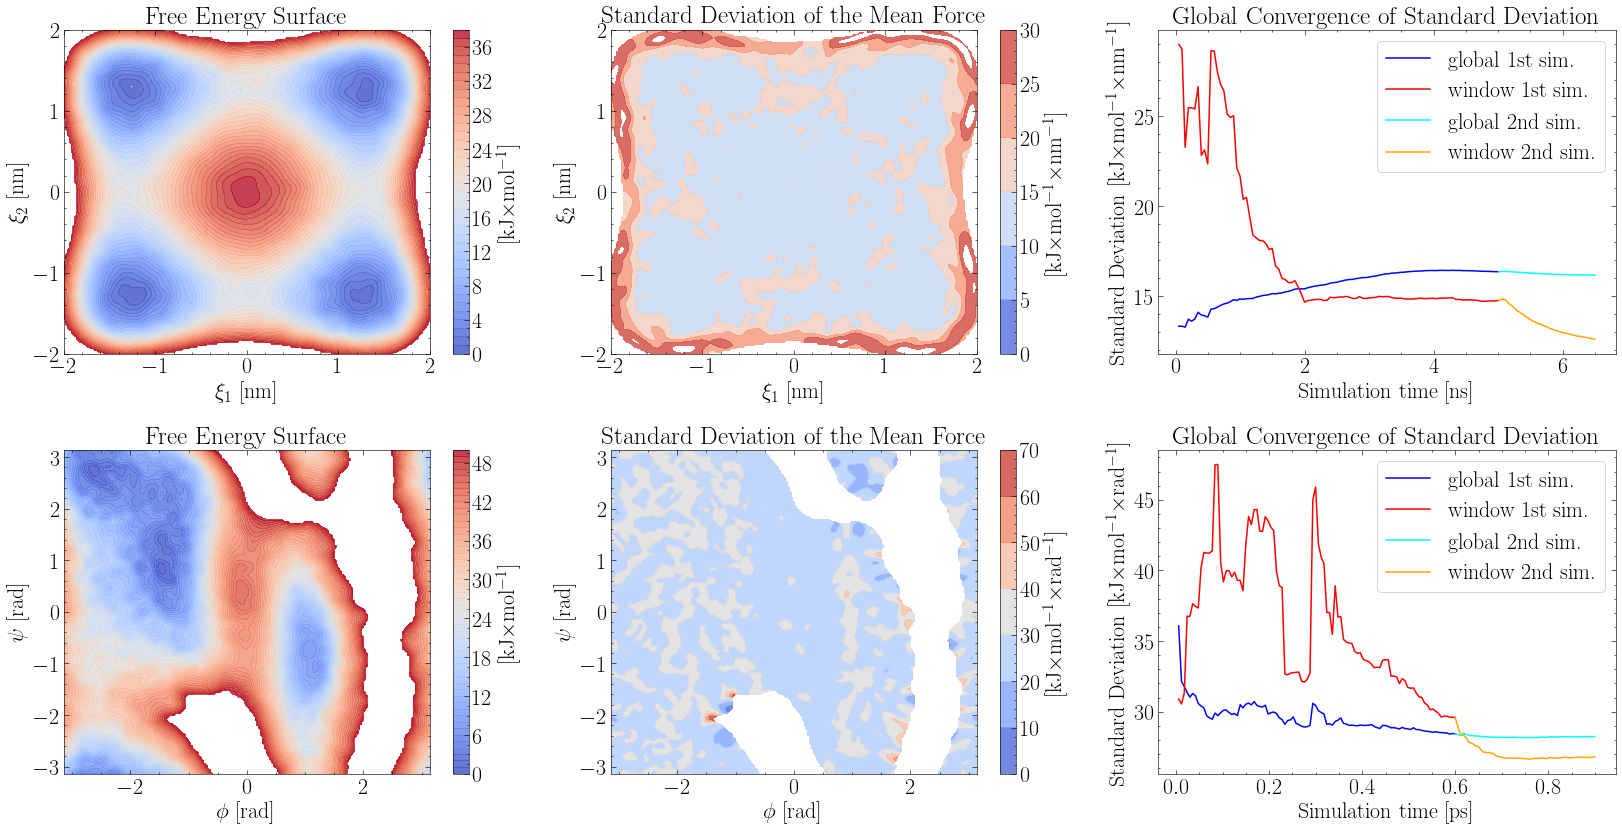

In [98]:
#Load force terms
[X, Y, FES, cutoff, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, ofe_history_old, ofe_history_window_old, ofe_history_time_old, ofe_history, ofe_history_window, ofe_history_time, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.load_pkl(results_path + "/bjola_pot_static_patch_window.pkl")
    
FES_lim = 39
ofe_map_lim = 31

plt.rcParams["figure.figsize"] = (23,12)
plt.subplot(2,3,1)
plt.contourf(X, Y, zero_to_nan(FES*cutoff), levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.xlabel(r'$\xi_1$ [nm]', fontsize=22)
plt.ylabel(r'$\xi_2$ [nm]', fontsize=22)
plt.title('Free Energy Surface', fontsize=25)
plt.colorbar(label="[kJ" + times + "mol" + pwr_neg + "]")

plt.subplot(2,3,2)
plt.contourf(X, Y, zero_to_nan(ofe*cutoff), levels=range(0, ofe_map_lim, 5), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.xlabel(r'$\xi_1$ [nm]', fontsize=22)
plt.ylabel(r'$\xi_2$ [nm]', fontsize=22)
plt.title('Standard Deviation of the Mean Force', fontsize=25)
plt.colorbar(label="[kJ" + times + "mol" + pwr_neg + times + "nm" + pwr_neg + "]")


plt.subplot(2,3,3)
plt.plot([time/1000 for time in ofe_history_time_old], ofe_history_old, c="blue", label="global 1st sim.")
plt.plot([time/1000 for time in ofe_history_time_old], ofe_history_window_old, c="red", label="window 1st sim.")
plt.plot([time/1000 for time in ofe_history_time], ofe_history, c="cyan", label="global 2nd sim.")
plt.plot([time/1000 for time in ofe_history_time], ofe_history_window, c="orange", label="window 2nd sim.")
plt.ylabel('Standard Deviation [kJ' + times + "mol" + pwr_neg + times + "nm" + pwr_neg + ']', fontsize=22)
plt.xlabel('Simulation time [ns]', fontsize=22)
plt.title('Global Convergence of Standard Deviation', fontsize=25)
plt.legend()



    
#Load force terms
[X, Y, FES, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, ofe_history_old, ofe_history_time_old, ofe_history_window_old, ofe_history, ofe_history_window, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.load_pkl(results_path + "/alanine_dipeptide_static_patch.pkl")

time_history.insert(0,ofe_history_time_old[-1])
ofe_history.insert(0,ofe_history_old[-1])
ofe_history_window.insert(0,ofe_history_window_old[-1])

FES_lim = 51
ofe_map_lim = 71

plt.subplot(2,3,4)
plt.contourf(X, Y, zero_to_nan(FES*cutoff), levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel(r'$\psi$ [rad]', fontsize=22)
plt.xlabel(r'$\phi$ [rad]', fontsize=22)
plt.title('Free Energy Surface', fontsize=25)
plt.colorbar(label="[kJ" + times + "mol" + pwr_neg + "]")

plt.subplot(2,3,5)
plt.contourf(X, Y, zero_to_nan(ofe*cutoff), levels=range(0, ofe_map_lim, 10), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.ylabel(r'$\psi$ [rad]', fontsize=22)
plt.xlabel(r'$\phi$ [rad]', fontsize=22)
plt.title('Standard Deviation of the Mean Force', fontsize=25)
plt.colorbar(label="[kJ" + times + "mol" + pwr_neg + times + "rad" + pwr_neg + "]")


plt.subplot(2,3,6)
plt.plot([time/1000 for time in ofe_history_time_old], ofe_history_old, c="blue", label="global 1st sim.")
plt.plot([time/1000 for time in ofe_history_time_old], ofe_history_window_old, c="red", label="window 1st sim.")
plt.plot([time/1000 for time in time_history], ofe_history, c="cyan", label="global 2nd sim.")
plt.plot([time/1000 for time in time_history], ofe_history_window, c="orange", label="window 2nd sim.")
plt.ylabel('Standard Deviation [kJ' + times + "mol" + pwr_neg + times + "rad" + pwr_neg + ']', fontsize=22)
plt.xlabel('Simulation time [ps]', fontsize=22)
plt.title('Global Convergence of Standard Deviation', fontsize=25)
plt.legend()

plt.tight_layout()
plt.savefig('/home/antoniu/Desktop/Windows/results_3.png', dpi=600, bbox_inches='tight')

plt.show()

plt.rcParams["figure.figsize"] = (5,4)

# Plot 4

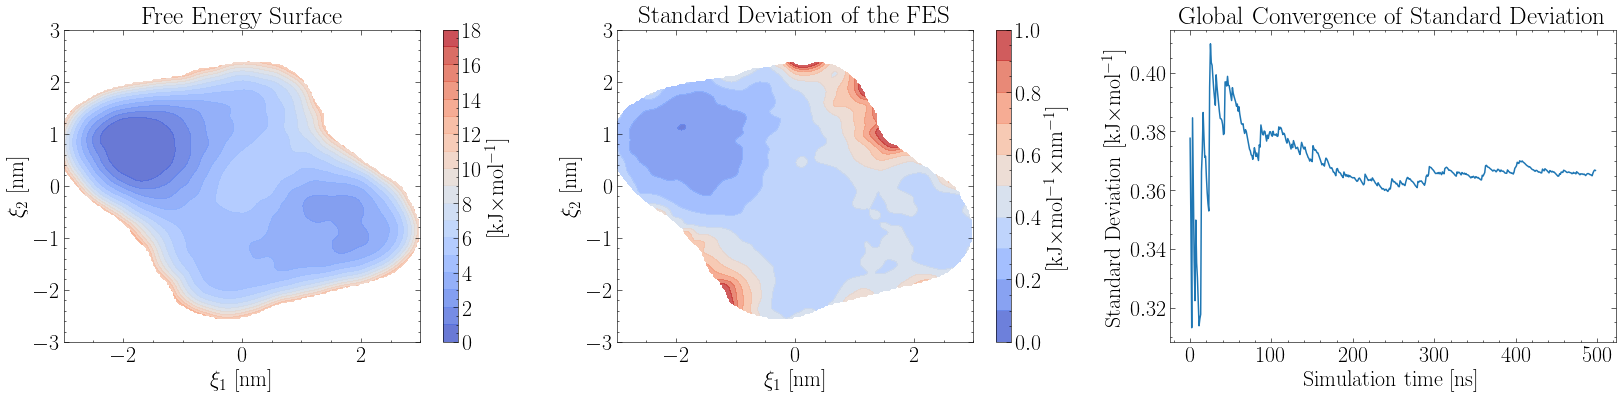

In [100]:
plt.rcParams["figure.figsize"] = (23,6)

#Load force terms
[X, Y, FES_avr, Ftot_den, sd_fes, sd_fes_prog] = MFI.load_pkl(results_path + "/invernizzi_multi_sim.pkl")

FES_lim = 19
ofe_map_lim = 11



plt.subplot(1,3,1)
plt.contourf(X, Y, zero_to_nan(np.where(Ftot_den > 0.1, FES_avr, 0)), levels=range(0, FES_lim, 1), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.xlabel(r'$\xi_1$ [nm]', fontsize=22)
plt.ylabel(r'$\xi_2$ [nm]', fontsize=22)
plt.title('Free Energy Surface', fontsize=25)
plt.colorbar(label="[kJ" + times + "mol" + pwr_neg + "]")

plt.subplot(1,3,2)
plt.contourf(X, Y, zero_to_nan(np.where(Ftot_den > 0.1, sd_fes, 0)), levels=np.linspace(0,1,11), cmap='coolwarm', antialiased=False, alpha=0.8)
plt.xlabel(r'$\xi_1$ [nm]', fontsize=22)
plt.ylabel(r'$\xi_2$ [nm]', fontsize=22)
plt.title('Standard Deviation of the FES', fontsize=25)
plt.colorbar(label="[kJ" + times + "mol" + pwr_neg + times + "nm" + pwr_neg + "]")


plt.subplot(1,3,3)
plt.plot(range(len(sd_fes_prog)), sd_fes_prog)
plt.ylabel('Standard Deviation [kJ' + times + "mol" + pwr_neg + ']', fontsize=22)
plt.xlabel('Simulation time [ns]', fontsize=22)
plt.title('Global Convergence of Standard Deviation', fontsize=25)

plt.tight_layout()
plt.savefig('/home/antoniu/Desktop/Windows/results_4_weight_fes.png', dpi=600, bbox_inches='tight')

plt.show()


# Plot 5

In [102]:
import os
os.chdir("/home/antoniu/Desktop/MFI_git/MFI")
from pyMFI import MFI
from pyMFI import run_plumed
from pyMFI import MFI1D
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
from scipy.signal import savgol_filter
import glob
from scipy import interpolate

def save_npy(object, file_name):
    with open(file_name, "wb") as fw:
        np.save(fw, object)


def load_npy(name):
    with open(name, "rb") as fr:
        return np.load(fr)

def save_pkl(object, file_name):
    with open(file_name, "wb") as fw:
        pickle.dump(object, fw)


def load_pkl(name):
    with open(name, "rb") as fr:
        return pickle.load(fr)


def atoi(text):
    return int(text) if text.isdigit() else text

<ipython-input-9-0113f0bf7412>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-9-0113f0bf7412>:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)
<ipython-input-9-0113f0bf7412>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retur

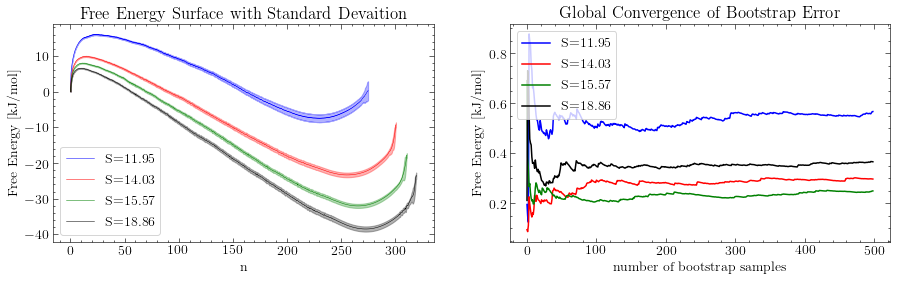

In [9]:
path = '/home/antoniu/Desktop/LJ_fluid/LJ_results/'
path_save = '/home/antoniu/Desktop/MFI_development/results'

data_name_list = ["n55", "n65", "n73", "n80"]
supersaturation_list = ["S=11.95", "S=14.03", "S=15.57", "S=18.86"]
color_list = ["blue", "red", "green", "black"]

count = -1
for i in range(len(data_name_list)):
    count += 1
    
    #Load results
    [grid_plot, FES_plot, sd_plot, var_fes, var_fes_prog, sd_fes_prog] = load_pkl(path_save + "/LJfluid_bootstrap_" + data_name_list[i])
     
    
    #plot FES with sd and sd progression    
    plt.rcParams["figure.figsize"] = ((15, 4))
    
    plt.figure(1)
    plt.subplot(1,2,1)
    plt.fill_between(grid_plot, FES_plot - sd_plot, FES_plot + sd_plot, alpha=0.3, color=color_list[count])
    plt.plot(grid_plot, FES_plot, linewidth=0.5, label=supersaturation_list[i], color=color_list[count])
    plt.title("Free Energy Surface with Standard Devaition")
    plt.xlabel("n")
    plt.ylabel("Free Energy [kJ/mol]")
    plt.legend()
    
    plt.subplot(1,2,2)
    # plt.scatter(range(len(sd_fes_prog)), sd_fes_prog, s=3)
    plt.plot(range(len(var_fes_prog)), var_fes_prog, label=supersaturation_list[i], color=color_list[count])
    plt.title("Global Convergence of Bootstrap Variance")
    plt.xlabel("number of bootstrap samples")
    plt.ylabel("Free Energy [kJ/mol]")    
    plt.legend()

plt.savefig('/home/antoniu/Desktop/Windows/results_5.png', dpi=600, bbox_inches='tight')
plt.show()


<ipython-input-10-4cc2579e2846>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-10-4cc2579e2846>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)
<ipython-input-10-4cc2579e2846>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

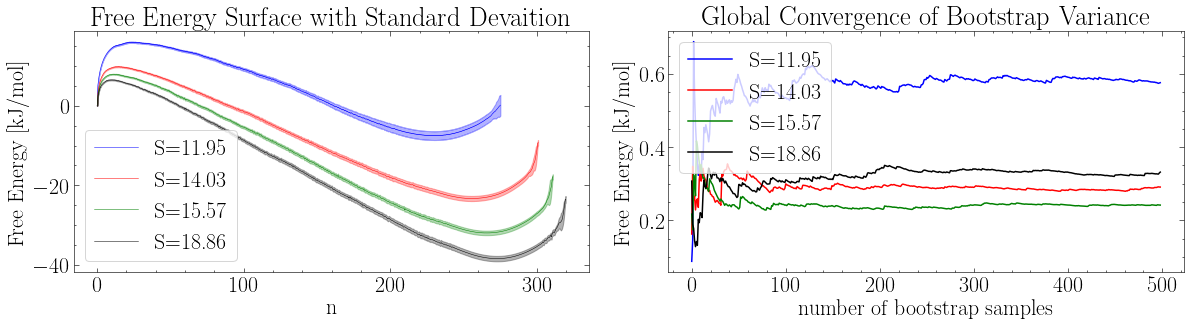

In [10]:
path = '/home/antoniu/Desktop/LJ_fluid/LJ_results/'
path_save = '/home/antoniu/Desktop/MFI_development/results'

data_name_list = ["n55", "n65", "n73", "n80"]
supersaturation_list = ["S=11.95", "S=14.03", "S=15.57", "S=18.86"]
color_list = ["blue", "red", "green", "black"]

plt.rcParams["figure.figsize"] = (17,5)

count = -1
for i in range(len(data_name_list)):
    count += 1
    
    #Load results
    [grid_plot, FES_plot, sd_plot, var_fes, var_fes_prog, sd_fes_prog] = MFI.load_pkl(path_save + "/LJfluid_bootstrap_" + data_name_list[i])
     
    
    #plot FES with sd and sd progression    
#     plt.rcParams["figure.figsize"] = ((12,5))
    
    plt.figure(1)
    plt.subplot(1,2,1)
    plt.fill_between(grid_plot, FES_plot - sd_plot, FES_plot + sd_plot, alpha=0.3, color=color_list[count])
    plt.plot(grid_plot, FES_plot, linewidth=0.5, label=supersaturation_list[i], color=color_list[count])
    plt.title("Free Energy Surface with Standard Devaition")
    plt.xlabel("n")
    plt.ylabel("Free Energy [kJ/mol]")
    plt.legend()
    
    plt.subplot(1,2,2)
    # plt.scatter(range(len(sd_fes_prog)), sd_fes_prog, s=3)
    plt.plot(range(len(var_fes_prog)), var_fes_prog, label=supersaturation_list[i], color=color_list[count])
    plt.title("Global Convergence of Bootstrap Variance")
    plt.xlabel("number of bootstrap samples")
    plt.ylabel("Free Energy [kJ/mol]")    
    plt.legend()

plt.tight_layout()
plt.savefig('/home/antoniu/Desktop/Windows/results_5.png', dpi=600, bbox_inches='tight')
plt.show()




## Other functions

In [2]:
def zero_to_nan(input_array):
    output_array = np.zeros_like(input_array)
    for ii in range(len(input_array)):
        for jj in range(len(input_array[ii])):
            if input_array[ii][jj] <= 0: output_array[ii][jj] = np.nan
            else: output_array[ii][jj] = input_array[ii][jj]
    return output_array